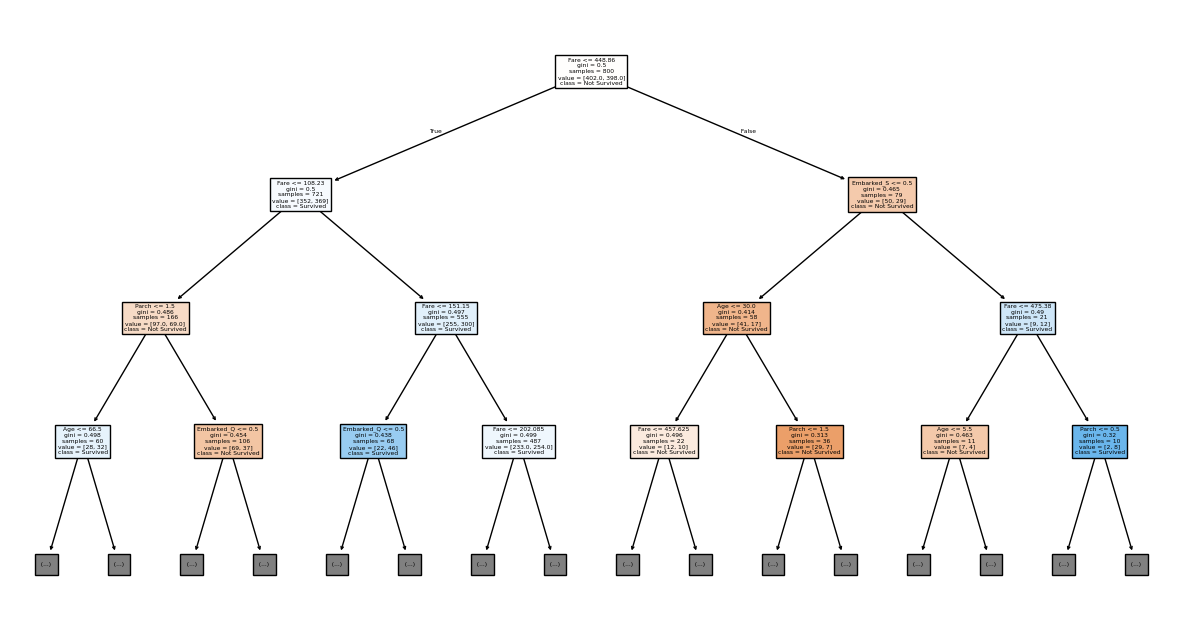

Model Accuracy: 0.5050


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
df = pd.read_csv("titanic.csv")
df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

X = df.drop("Survived", axis=1)
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(15, 8))
plot_tree(model, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True, max_depth=3)
plt.show()

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")